In [ ]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
from scipy.interpolate import *

((10,), (9,))

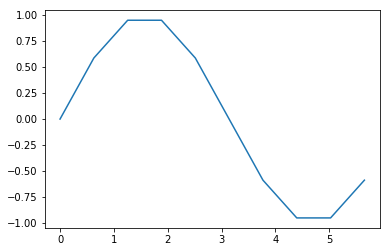

In [2]:
x = np.linspace(0, 2*np.pi, 11)[0:-1]
y = np.sin(x)
plt.plot(x,y)

# analytic derivative:
dydxa = np.cos(x)

# numpy derivatives:
dydx1 = np.diff(y)/np.diff(x)
np.shape(y),np.shape(dydx1)

In [3]:
# make a new grid for the derivative at half points: (numpy does not associate vars and coords)
h = x[1] - x[0]
x_half = x[0:-1] + h / 2

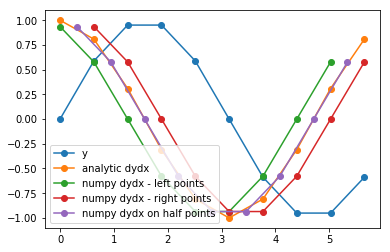

In [4]:
plt.plot(x,y,marker='o',label='y')
plt.plot(x,dydxa,marker='o',label='analytic dydx')
plt.plot(x[0:-1],dydx1,marker='o',label='numpy dydx - left points')
plt.plot(x[1:],dydx1,marker='o',label='numpy dydx - right points')
plt.plot(x_half,dydx1,marker='o',label='numpy dydx on half points')
plt.legend(loc='lower left')

In [5]:
# xarray derivatives:
da = xr.DataArray(y ,
                  dims=['x'],
                  coords={'x': x})

dydxDA = da.diff('x')/da.x.diff('x')
dydxDA.x

<xarray.DataArray 'x' (x: 9)>
array([ 0.628319,  1.256637,  1.884956,  2.513274,  3.141593,  3.769911,
        4.39823 ,  5.026548,  5.654867])
Coordinates:
  * x        (x) float64 0.6283 1.257 1.885 2.513 3.142 3.77 4.398 5.027 5.655

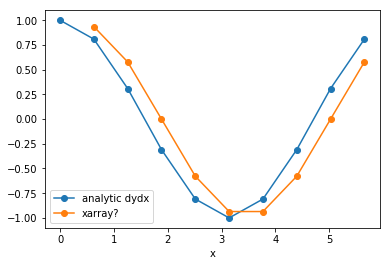

In [6]:
plt.plot(x,dydxa,marker='o',label='analytic dydx')
dydxDA.plot(marker='o',label='xarray?') # default coordinates?
plt.legend()

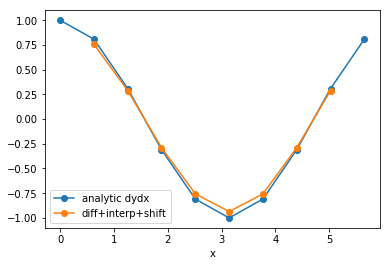

In [7]:
dy = da.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
dx = da.x.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
dydx = dy/dx

plt.plot(x,dydxa,marker='o',label='analytic dydx')
dydx.plot(marker='o',label='diff+interp+shift') # default coordinates?
plt.legend()

In [8]:
# What about boundary points?  We could extend the whole DataArray:
da_extend = xr.concat([da[-1], da, da[0]],'x')
da_extend

<xarray.DataArray (x: 12)>
array([ -5.877853e-01,   0.000000e+00,   5.877853e-01,   9.510565e-01,
         9.510565e-01,   5.877853e-01,   1.224647e-16,  -5.877853e-01,
        -9.510565e-01,  -9.510565e-01,  -5.877853e-01,   0.000000e+00])
Coordinates:
  * x        (x) float64 5.655 0.0 0.6283 1.257 1.885 2.513 3.142 3.77 4.398 ...

In [9]:
# ... but the coordinate variable gets messed up - must separately extend the data and coordinate
y_extend = xr.concat([da[-1], da, da[0]],'x')
x_extend = xr.concat([da.x[0]-h, da.x, da.x[-1]+h],'x')

In [10]:
dy = y_extend.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
dx = x_extend.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
dydx_extended = dy/dx

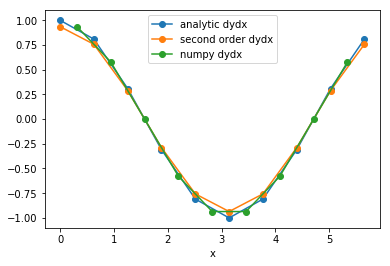

In [11]:
plt.plot(x,dydxa,marker='o',label='analytic dydx')
dydx_extended.plot(marker='o',label='second order dydx')
plt.plot(x_half,dydx1,marker='o',label='numpy dydx')
plt.legend()

In [12]:
abs(dydxa-dydx_extended).max()

<xarray.DataArray ()>
array(0.06451071621136095)

<xarray.DataArray ()>
array(0.06451071621136095)
<xarray.DataArray ()>
array(0.016368356916534044)
<xarray.DataArray ()>
array(0.004107264756438744)
<xarray.DataArray ()>
array(0.0010277667514616562)
<xarray.DataArray ()>
array(0.0002570011307421183)


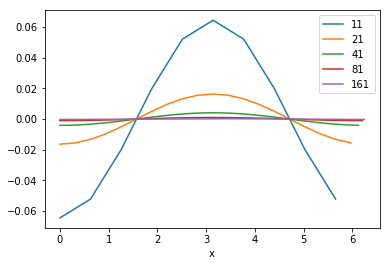

In [13]:
for numpoints in [11,21,41,81,161]:
    x = np.linspace(0, 2*np.pi, numpoints)[0:-1]
    y = np.sin(x)
    dydx = np.cos(x)
    da = xr.DataArray(y , dims=['x'], coords={'x': x})
    h = x[1] - x[0]
    y_extend = xr.concat([da[-1], da, da[0]],'x')
    x_extend = xr.concat([da.x[0]-h, da.x, da.x[-1]+h],'x')
    dy = y_extend.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
    dx = x_extend.diff('x').rolling(x=2).mean().shift(x=-1).dropna('x')
    residual = dy/dx - dydx
    print(abs(residual).max())
    residual.plot(label=numpoints)
plt.legend()